# Quantum mechanics and the time-independent Schrodinger equation: The particle in a box I <br>

## Muzammil Mushtaq <br>

Reference:
https://doi.org/10.1021/acs.jchemed.7b00003

A standard problem in quantum chemistry is the particle in a box. This is a mostly educational example to illustrate fundamentals of quantum mechanics and the difference to classical mechanics. As the potential within the box is zero, it is the simplest example (apart from the free particle) in quantum mechanics.

In this example, a particle is contained in a box of length $L$, with zero potential within the box, and potential walls extending to infinity at both sides of the box: 

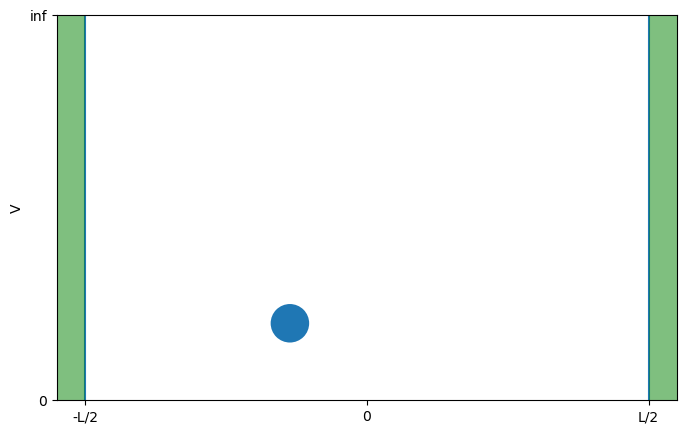

In [9]:
from numpy import *
from scipy import linalg as la

import matplotlib.pyplot as plt

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

mf=10
fig, ax = plt.subplots(figsize=(8,5))
ax.vlines(0,0,2)
ax.vlines(1,0,2)
plt.xticks(linspace(0,1,3), ('-L/2','0', 'L/2'),fontsize=mf)
plt.yticks(arange(2), ('0','inf'),fontsize=mf)

ax.set_xlim(left=-0.05,right=1.05)
ax.set_ylim(bottom=0,top=1.0)

ax.vlines(-0.05,0,2, color='green', lw=40, alpha=0.5)
ax.vlines(1.05,0,2, color='green', lw=40, alpha=0.5)
ax2=fig.add_subplot(111,aspect='equal') 
circle=plt.Circle((0.3,0.2),0.05)
ax2.add_artist(circle)
ax2.axis('off')
ax.set_ylabel('V',fontsize=mf)
plt.show()

The Hamiltonian for this problem **inside** the box reads
\begin{align}
\hat{H} = \hat{T} + V = -\frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2}
\end{align}

## Time-independent Schrödinger Equation
\begin{align}
H \Psi(x) = E \Psi(x)
\end{align}


We know the analytical solution to this problem - the wave functions for the 1D box are
\begin{align}
\Psi_n(x) =\sqrt{\frac{2}{L}} \sin\left(\frac{n \pi (x+L/2)}{L}\right)
\end{align}
and the corresponding energies are
\begin{align}
E_n =\frac{n^2 \pi^2 \hbar^2}{2mL^2}
\end{align}

Note that for the Time-independent Schrödinger Equation we can choose the states real and will do so in this notebook. 

## Difference to classical mechanics

For a classical particle in the box, the Hamiltonian (in $[-\frac{L}{2}, \frac{L}{2}]$) reads
\begin{align}
H(p,q) = T + V = \frac{p^2}{2m}
\end{align}
For a given energy of the particle, the momentum of the particle is
\begin{align}
p = \pm\sqrt{E\cdot2m}
\end{align}
and the particle moves either to the left (-) or the right (+). The position of the particle is completely undetermined (it could be anywhere in the box) unless an initial value is defined and the time evolution of the system is studied.

In quantum mechanics, the probability of finding the particle at a certain position $x$ for a given energy is __not equal__ for all $x$. And the possible values for the total energy of the system are not continuous __but discrete__.  


## Matrix form of quantum mechanics

https://doi.org/10.1007/BF01328377 \
https://doi.org/10.1007/BF01379806 \
https://aapt.scitation.org/doi/10.1119/1.3009634

As quantum-mechanical systems exhibit discrete energies and their states can be described using functions (vectors), and operators like ${\hat{x}}$ and ${\hat{p}}$ are not commutative (cannot be determined simultaneously) this naturally leads to the emergence of __matrix mechanics__. 

One first chooses a (finite) orthonormal basis set $\{\phi_i\}$ and then expresses operators in this basis:

\begin{align}
\hat{x} \rightarrow x_{ij} = \left\lt \phi_i \right| \hat{x} \left| \phi_j\right\gt
\end{align}
\begin{align}
\hat{p} \rightarrow p_{ij} = \left\lt \phi_i \right| \hat{p} \left| \phi_j\right\gt
\end{align}
etc.

and also represent the wavefunction in this basis:
\begin{align}
\left|\Psi\right\gt & \approx \sum_j  \left|\Phi_j\right\gt \left\lt\Phi_j\right| \left. \Psi\right\gt \\
  & =  \sum_j c_j \left|\Phi_j \right\gt \\
\end{align}

What we really only store on the computer are the matrix elements of the operators and the coefficients of the wavefunction. 


In a computer representation, we need to resort to linear algebra, and all operations in quantum mechanics can be described by vector-vector and matrix-vector multiplication, and matrix diagonalization. 

In the following, we will look at the matrix representation of the quantum particle in a box.


### Hamiltonian Matrix

The matrix elements of the Hamiltonian: 
\begin{align}
 H_{i,j} = \left\lt \phi_i \right| H \left| \phi_j\right\gt
\end{align}

In the following we will be working in **coordinate representation**, that is, we will have wavefunctions $\psi(x)$ and we will just represent them on a number of equidistant points we get for instance from a `numpy.linspace`. 

### Normalization

We will for now use the Riemann sum for evaluating integrals. That is, we will evaluate integrals such as the norm of the wavefunction as: 
\begin{align}
  \int\limits_{-L/2}^{L/2}\left|\psi(x)\right|^2 dx  = \left\lt \psi(x) \right.\left| \psi(x)\right\gt = \delta x \sum_i \left|\psi(x_i)\right|^2 = 1
\end{align}

Note, that since $\delta x$ is just a constant we can simply multipy it into the wavefunction define new sampled wavefunction 
\begin{align}
  \Psi(x_i)  = \sqrt{\delta x} \psi(x_i)
\end{align}
such that 
\begin{align}
  \sum_i \left|\Psi(x_i)\right|^2 = 1
\end{align}
and we do not hace to carry around the $\delta x$ all the time. With this we can use things like:
\begin{align}
\left\lt \Psi_1(x) \right.\left| \Psi_2(x)\right\gt = \sum_i \Psi_1^*(x_i)  \Psi_2(x_i) 
\end{align}
which is just a dot-product. 


What are the ${\phi_i}$ in this case? They are just Functions with all points from the `numpy.linspace` set to zero, except one, the $i$th, which is set to unity.  We have what is called **discrete delta property**
\begin{align}
\phi_j(x_i) = \delta_{ij}
\end{align}
and 
\begin{align}
 \left\lt \phi_j(x) \right.\left| \phi_j(x)\right\gt = \sum_i \left(\phi_j(x_i)\right)^2 = 1
\end{align}
and 
\begin{align}
 \left\lt \phi_j(x) \right.\left| \phi_l(x)\right\gt = \sum_i \phi_j(x_i) \phi_l(x_i)  = \delta_{jl}
\end{align}

### Wavefunction in this basis
Expessing the wavefunction in a basis ($\approx$ because of finite sum):

\begin{align}
  \left|\Psi\right\gt & \approx \sum_j  \left|\Phi_j\right\gt \left\lt\Phi_j\right| \left. \Psi\right\gt \\
  & =  \sum_j c_j \left|\Phi_j \right\gt \\
  & = \Psi(\left\{x_j\right\})
\end{align}
 




### Kinetic energy

The kinetic in coordinate representation energy is given as the Laplacian (see lecture about differentiation) scaled with $\frac{-1}{2m}$. We will for now just use the Laplacian matrix $L_{ij}$ we already know as we have used it already for functions that are sampled on a `linspace`. Since the $\phi_j$ are also just functions sampled on a `linspace` and only 1 in one point but zero otherwise we have 
\begin{align}
 \left\lt \phi_i(x) \right| L \left| \phi_j(x)\right\gt = L_{ij}
\end{align}
so we can use the Laplacian matrix directly in the Hamiltonian

### Potential energy

For the time being we only look at the case where potential energy is zero in the area where there wavefunction resides. It will hence not enter the Hamiltonian matrix explicitly. 


## Atomic units

When studying quantum mechanics numerically it is beneficial to do so in units that are suitable for representation on a computer. For instance, treating the Planck constant $h = 6.62607544267\times10^{-34}$ Js in SI units is bound to fail. We therefore switch to <i>atomic units</i> which have comprehensible numerical values: The basis units are

|Unit   | Reference    | symbol | Numerical value a.u.   | Numerical value SI    |
|---:   |:-------------|:-------------|:-----------|:------|
|Action | Reduced Planck constant| $\hbar$      | 1          | $1.055\times10^{-34}$ Js |
|Length | Bohr redius            | $a_0$        | 1          | $5.292\times10^{-11}$ m  |
|Charge | Elementary charge      | $e$          | 1          | $1.602\times10^{-19}$ C  |
|Mass   | Electron mass          | $m_e$        | 1          | $9.109\times10^{-31}$ kg  |


Derived units


|Unit   | Relation    | symbol         | Numerical value a.u.   | Numerical value SI    |
|---:   |:-------------|:-------------|:-----------|:------|
|Energy |  $\frac{\hbar^2}{m_e a_0^2}$ | $E_h$     | 1          | $4.360\times10^{-18}$ J = 27.211 eV |
|Time   |  $\frac{\hbar}{E_h}$         | $-$ (a.u.)       | 1          | $2.419\times10^{-17}$ s = 0.024 fs  |



0.1111111111111111
[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[-2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0. 

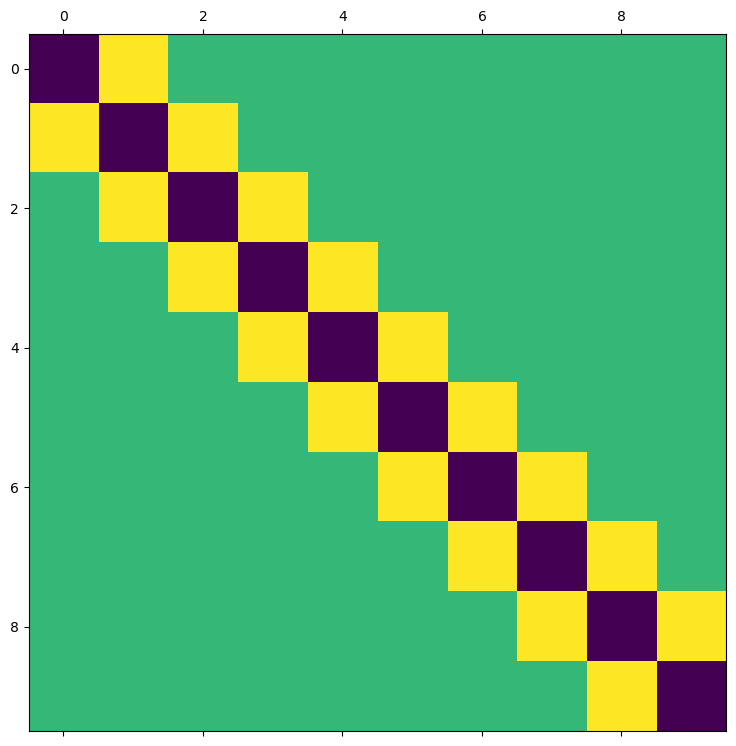

In [4]:
# atomic units
hbar = 1.0
m = 1.0

# set number of points for numerical approximation
steps = 10

#width of the box
L = 1

#grid along x
L2 = L/2
xgrid, h = linspace(-L2,L2,steps,retstep=True)
print (h)
# get step size h for the numerical derivative
# create the second derivative matrix

print (diag(ones(steps)))

print (diag(ones(steps-1),1))


print ((-2.0 * diag(ones(steps))+diag(ones(steps-1),1)+diag(ones(steps-1),-1)))

Laplacian = (-2.0 * diag(ones(steps))+diag(ones(steps-1),1)+diag(ones(steps-1),-1))/(float)(h**2)
print (Laplacian)
# we can look at this matrix - it is a band matrix as only the j-1, j, and j+1 
# grid points are required for each second derivative - see lecture 5
# print(Laplacian)

plt.rcParams["figure.figsize"] = (9,9)
plt.matshow(Laplacian)
plt.show()

1.0


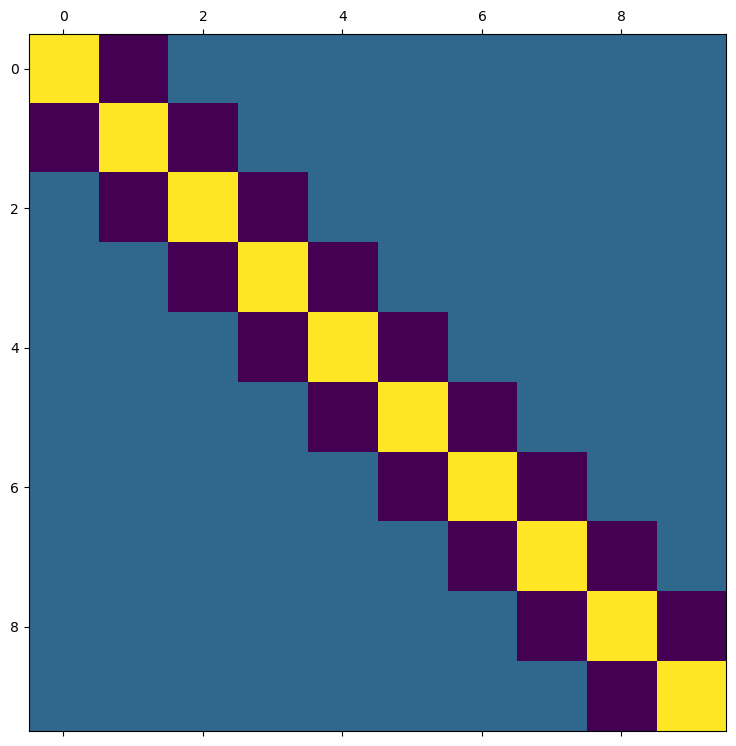

In [10]:
'''                          Now construct the Hamiltonian matrix
'''
print (hbar)
Hamiltonian = ((-0.5*(hbar**2)/m)) * Laplacian

#print(Hamiltonian)
plt.matshow(Hamiltonian)
plt.show()

## Linear algebra

We have to sole now the linear algebra problem 
\begin{align}
  H \Psi = E \Psi
\end{align}
for $H$ being the Hamiltonian matrix and $\Psi$ being a function sampled on points. One can interprete as a vector.  

A set of linear algebraic equations for a looks like this
\begin{align}
  A x = b
\end{align}
or 
\begin{align}
a_{11} x_1 + a_{12} x_2 + a_{13} x_3 + \ldots + a_{1N} x_N &= b_1 \\
a_{21} x_1 + a_{22} x_2 + a_{23} x_3 + \ldots + a_{1N} x_N &= b_2 \\
\vdots & \\
a_{M1} x_1 + a_{M2} x_2 + a_{M3} x_3 + \ldots + a_{MN} x_N &= b_M
\end{align}
for $N$ unknowns $x$, $M$ equations relating the unknowns and known coefficients $a_{ij}$ with $i=1,2,\ldots,M$ and $j=1,2,\ldots,N$, and $b_i$'s.

For $N=M$, this system can probably be solved uniquely. There may be degeneracies so that there is no unique solution. A degeneracy occurs if for example one or more of the variables (or the equations) is a linear combination of any of the others (they are linearly dependent).

It can also lead to problems if some of the variables (equations) are not exactly linearly dependent but almost so and the numerical (floating-point) precision is not high enough to resolve this. For very large $N$, accumulated error can also lead to problems.

The coefficients $a_{ij}$ can be written as a matrix as
\begin{align}
\mathbf{A} = \begin{pmatrix} 
a_{11} & a_{12} & \ldots & a_{1N} \\
a_{21} & a_{22} & \ldots & a_{2N} \\
\vdots & & \ddots & \vdots \\
a_{M1} & a_{M2} & \ldots & a_{MN} \\
\end{pmatrix}
\end{align}
and the solutions $b_{j}$ as a column vector
\begin{align}
\mathbf{b} = \begin{pmatrix} 
b_{1} \\
b_{2} \\
\vdots \\
b_{M} \\
\end{pmatrix}
\end{align}
By convention, the first index denotes the row and the second the column of the matrix. Matrix elements are referenced as we have already discussed; but there are some perks to these that may not be obvious at first. How is the matrix stored in memory? Basically, there are two ways that it can be stored: Either in rows after rows or in columns after column. If you just like to access one element of a matrix, this does not really matter. But if you like to loop over rows and columns, for example in a matrix multiplication, then this may be faster if you access the elements in the order they are stored in memory (contiguous in memory). This way, every subsequent element is just an increment in the physical memory, and not at a completely different memory address.

Different programming languages unfortunately use different orders to store matrix elements in memory. Fortran for example uses __column-major order__, where consecutive elements of a column are stored next to each other (the first index $i$ runs fastest): $a_{12}$ and $a_{22}$ lie next to each other. In total, the array $\mathbf{A}$ is stored as $\mathbf{A}=a_{11},a_{21},\ldots,a_{M1},a_{12},a_{22},\ldots,a_{M2},\ldots,a_{1N},a_{2N},\ldots,a_{MN}$.

In C/C++ on the other hand, the order is __row-major order__ where the second index ($j$) runs fastest with consecutive elements $a_{12}$ and $a_{13}$. In total, the array $\mathbf{A}$ is stored as $\mathbf{A}=a_{11},a_{12},\ldots,a_{1N},a_{21},a_{22},\ldots,a_{2N},\ldots,a_{M1},a_{M2},\ldots,a_{MN}$.

Generally this will not be important for you, but whenever arrays are passed between languages (Lapack routines written in Fortran to python), you will see that the meaning of rows and columns in your matrix is not what you expect.

Numpy arrays are stored in row-major order unless explicitly specified.
`order = ‘C’` or `order = ‘F’`
(row-major (C-style) or column-major (Fortran-style) order).

## Matrix diagonalization or eigen decomposition

In time-independent quantum mechanics, matrix diagonalization is the most fundamental task that needs to be carried out. For all matrix manipulations, we use the linear algebra package from scipy (linalg) (we could also use numpy linalg but scipy has all the numpy routines plus a few additional ones). \
https://docs.scipy.org/doc/scipy/reference/linalg.html

Matrix diagonalization is the process of transforming a square matrix $\mathbf{A}$ into a diagonal matrix $\mathbf{D}$, and results in the eigenvectors (the set of vectors that diagonalizes $\mathbf{A}$) and eigenvalues $\lambda_i$ (the diagonal entries on $\mathbf{D}$). This corresponds to a basis transformation of the original matrix into a basis where the matrix is in its canonical form.
\begin{align}
\mathbf{A} =\mathbf{Q} \mathbf{D} \mathbf{Q}^{-1}
\end{align}
The square matrix $\mathbf{Q}$ contains the eigenvectors $\mathbf{Q}_i$ for each eigenvalue $i$. For __normal__ matrices ($\mathbf{A}^\dagger\mathbf{A} = \mathbf{A}\mathbf{A}^\dagger$) it holds $ \mathbf{Q}^{-1} =  \mathbf{Q}^{T}$ and $\mathbf{Q}$ is unitary.

We can also write this as
\begin{align}
\mathbf{A} \mathbf{Q}_i =  \lambda_i  \mathbf{Q}_i
\end{align}
Look familiar? With $\mathbf{A}$ the Hamiltonian matrix, $\mathbf{Q}_i$ the wave function of state $i$, and $\lambda_i$ the eigenvalue (energy) of state $i$, this is just the time-independent Schrödinger equation. So solving the TISE is equivalent to an eigen decomposition. With $\mathbf{A}$ a Hermitian (or, for real-valued Hamiltonians, symmetric) matrix, the eigenvalues $\lambda_i$ are real numbers and correspond to physical observables.

This transformation into the canonical form is extremely powerful, as it reduces the number of parameters of the matrix from $N \times N$ to just $N$, and it provides a linear map that transforms any subsequent matrix equation into the simpler form. As the "matrix diagonalization" yields the eigenvectors and eigenvalues, it is more precise to refer to it as "eigen decomposition", as the process decomposes the original matrix into the product of three matrices (of which one is diagonal). Matrix diagonalization is also required for matrix inversion ($\mathbf{A} \rightarrow \mathbf{A}^{-1}$) as matrices are inverted by transforming them into their diagonal form and then inverting the diagonal elements. For a singular or close-to-singular matrix (a matrix that is not invertible (= has zero eigenvalues) or has no eigen decomposition), singular value decomposition is used (we will see this later).

In all other cases, the eigen decomposition can be carried out using direct approaches, that directly decompose the matrix as a whole, and iterative routines like Davidson or Lanczos that operate on a subspace of the full matrix (Krylov space for Lanczos). Overall, eigen decomposition is complicated business, and depending on the kind of values in the matrix, different routines are chosen. For us this means that have to distinguish between real and complex matrices, symmetric and nonsymmetric matrices, and we need to be aware that different algorithms are used for the solution.

For practical purposes we will rely on existing routines that are implemented in various libryries and just use them and do not bother with implementation details. If you are interested in details look at:

http://www.netlib.org/lapack/explore-html/db/d55/group__complex16_g_eeigen_ga0eb4e3d75621a1ce1685064db1ac58f0.html 
\
https://software.intel.com/content/www/us/en/develop/documentation/mkl-developer-reference-c/top/lapack-routines/lapack-least-squares-and-eigenvalue-problem-routines/lapack-least-squares-and-eigenvalue-problem-driver-routines/nonsymmetric-eigenvalue-problems-lapack-driver-routines/geev.html


In [11]:


# diagonalize the Hamiltonian (Hermitian/symmetric matrix, uses Lapack dsyevd routine)
# DOES NOT CHECK THAT YOUR MATRIX IS HERMITIAN/SYMMETRIC SO YOU NEED TO BE SURE ABOUT IT
eigenval, eigenvec = la.eigh(Hamiltonian)
print(eigenvec)
print (eigenvec[:,1])
print(eigenval)

# the sign of the eigenvectors is arbitrary. We just loop through then
# and fix the first element of each eigenvector to be positive
for n in range(steps):
    if eigenvec[0,n] < 0.0:
        eigenvec[:,n] = -eigenvec[:,n]

# Note that the eigenvectors are normalized and orthogonal:
B = eigenvec.T @ eigenvec
# -------------^ matmul

unit = diag(ones(steps))
allclose(B,unit)

[[ 0.12013117  0.23053002  0.3222527   0.38786839  0.42206128  0.42206128
   0.38786839 -0.3222527   0.23053002 -0.12013117]
 [ 0.23053002  0.38786839  0.42206128  0.3222527   0.12013117 -0.12013117
  -0.3222527   0.42206128 -0.38786839  0.23053002]
 [ 0.3222527   0.42206128  0.23053002 -0.12013117 -0.38786839 -0.38786839
  -0.12013117 -0.23053002  0.42206128 -0.3222527 ]
 [ 0.38786839  0.3222527  -0.12013117 -0.42206128 -0.23053002  0.23053002
   0.42206128 -0.12013117 -0.3222527   0.38786839]
 [ 0.42206128  0.12013117 -0.38786839 -0.23053002  0.3222527   0.3222527
  -0.23053002  0.38786839  0.12013117 -0.42206128]
 [ 0.42206128 -0.12013117 -0.38786839  0.23053002  0.3222527  -0.3222527
  -0.23053002 -0.38786839  0.12013117  0.42206128]
 [ 0.38786839 -0.3222527  -0.12013117  0.42206128 -0.23053002 -0.23053002
   0.42206128  0.12013117 -0.3222527  -0.38786839]
 [ 0.3222527  -0.42206128  0.23053002  0.12013117 -0.38786839  0.38786839
  -0.12013117  0.23053002  0.42206128  0.3222527 ]
 [

True

In [12]:
# import some interactuve tools
from ipywidgets import interact

# dynamically create figure
def plot_psi(n=1):

    # we have eigenstates starting at n=1
    # but the numpy arrays start at index zero
    # so we just rename the n to n-1 in 
    # order to get the correct vectors and energies
    nm1 = n-1
    fig, ax = plt.subplots(3,figsize=(6,3*3),sharex=True)
    
    #plot 1
    #Column-major order from Fortran leads to the unexpected indexing of the eigenvectors
    #we could also transpose the eigenvectors using transpose() or .T
    ax[0].plot(xgrid,eigenvec[:,nm1])
    ax[0].set_ylabel('$\Psi$',fontsize=mf)
    ax[0].text(-L2,max(eigenvec[:,nm1]*0.9),r'Wavefunction'.format(nm1),fontsize=mf)

    #plot 2
    ax[1].plot(xgrid,eigenvec[:,nm1]**2)
    ax[1].set_ylabel('$|\Psi|^2$',fontsize=mf)
    ax[1].text(-L2,max(eigenvec[:,nm1]**2*0.9),'Density',fontsize=mf)

    #plot 3
    
    ax[2].hlines(eigenval[nm1],-L2,L2)
    ax[2].set_xlabel('x (a.u.)',fontsize=mf)
    ax[2].set_ylabel('E (E$_h$)',fontsize=mf)
    ax[2].text(-L2,eigenval[nm1],'Energy',fontsize=mf)
    ax[2].set_ylim(0,eigenval[0:10].max()+10)
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=mf)
        ax[i].yaxis.set_tick_params(labelsize=mf)
    
    plt.subplots_adjust(hspace = 0.0)
    plt.show()
    
interact(plot_psi, n=(1, 10, 1))

print ('Total Eigenstates : ',n)

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

9


In [8]:
'''                    We can compare this to the analytical solution
'''
def get_exact_waves(xgrid,L):
    "create the analytical particle in a box functions"
    steps=len(xgrid)          # number of points
    h=xgrid[1]-xgrid[0]       # dx
    ww = empty((steps,steps)) # space for all analytical solutions
    prefac=sqrt(2*h/L)        # normalization
    for i in range(1,steps+1):
        angle = i * pi * linspace(0,L,steps)/L
        ww[i-1] = sin(angle)*prefac
    return ww

def get_exact_energy(n,L):
    energy=empty(n)
    for i in range(1,n+1):
        energy[i-1] = i**2 * pi**2 / (2*L**2)
    return energy

wavef=get_exact_waves(xgrid,L)
ene = get_exact_energy(len(xgrid),L)


# dynamically create figure
def plot_psi_ex(n=1):

    # we have eigenstates starting at n=1
    # but the numpy arrays start at index zero
    # so we just rename the n to n-1 in 
    # order to get the correct vectors and energies
    nm1 = n-1
    
    fig, ax = plt.subplots(3,figsize=(6,3*3),sharex=True)
    
    ax[0].plot(xgrid,eigenvec[:,nm1])
    ax[0].plot(xgrid,wavef[nm1],color='black',linestyle = '--')
    ax[0].set_ylabel('$\Psi$',fontsize=mf)
    ax[0].text(-L2,max(eigenvec[:,nm1]*0.9),'Wave function',fontsize=mf)

    # plot 2
    ax[1].plot(xgrid,eigenvec[:,nm1]**2)
    ax[1].plot(xgrid,wavef[nm1]**2,color='black',linestyle = '--')
    ax[1].set_ylabel('$|\Psi|^2$',fontsize=mf)
    ax[1].text(-L2,max(eigenvec[:,nm1]**2*0.9),'Density',fontsize=mf)


    ax[2].hlines(eigenval[nm1],-L2,L2)
    ax[2].hlines(ene[nm1],-L2,L2,color='black',linestyle = '--')
    ax[2].set_xlabel('x (a.u.)',fontsize=mf)
    ax[2].set_ylabel('E (E$_h$)',fontsize=mf)
    ax[2].text(-L2,eigenval[nm1],'Energy',fontsize=mf)
    ax[2].set_ylim(0,ene[0:10].max()+10)
    for i in range(3):
        ax[i].xaxis.set_tick_params(labelsize=mf)
        ax[i].yaxis.set_tick_params(labelsize=mf)

    plt.subplots_adjust(hspace = 0.0)
    plt.show()

interact(plot_psi_ex, n=(1, 10, 1))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.plot_psi_ex(n=1)>

In [20]:
'''                     Now we can compute expectation values
'''
def get_x(psi,L,nsteps):
    xgrid = linspace(-L/2,L/2,nsteps)
    psi_x_psi = psi[:]*xgrid*psi[:]
    expect = sum(psi_x_psi)
    return expect

def get_x_all(wavef,L,nsteps):
    xgrid = linspace(-L/2,L/2,nsteps)
    psi_x_psi = conj(wavef.T)*xgrid*wavef.T
    expec = sum(psi_x_psi,axis=1)
    return expec


myx1 = get_x(eigenvec[0],L,len(eigenvec[0]))
print(myx1)
myx2 = get_x_all(eigenvec,L,len(eigenvec[0]))
print(myx2)


-6.938893903907228e-17
[ 4.41313652e-15 -2.26554886e-15 -2.77555756e-15  5.82867088e-16
  1.27675648e-15 -9.57567359e-16  1.04083409e-15 -1.26287869e-15
 -1.56125113e-16  8.32667268e-17]


Generate a function to obtain $\langle x^2 \rangle$ and compute the uncertainty of $x$, $\sqrt{\langle x^2 \rangle - \langle x \rangle^2}$, for the first ten states.

In [31]:
def get_x_all_sq(wavef,L,nsteps):
    xgrid = linspace(-L/2,L/2,nsteps)
    psi_x_psi = conj(wavef.T)*xgrid**2 *wavef.T
    expec = sum(psi_x_psi,axis=1)
    return expec



myx_sq = get_x_all_sq(eigenvec,L,len(eigenvec[0]))
print(myx_sq)

print ('Get standard deviation')

St_dev =((myx_sq)-(myx2)**2)**0.5

print ('Standard deviation =',St_dev)



Task 2
##################################################
[0.04877342 0.1054245  0.11573561 0.11908296 0.12024276 0.12024276
 0.11908296 0.11573561 0.1054245  0.04877342]
Get standard deviation
Standard deviation = [0.22084706 0.3246914  0.34019937 0.34508399 0.34676038 0.34676038
 0.34508399 0.34019937 0.3246914  0.22084706]


calculate  $\langle p^2 \rangle$?

In [30]:
def p2(wavef,L,nsteps):
    xgrid = linspace(-L/2,L/2,nsteps)
    psi_x_psi = conj(wavef.T)*xgrid**2 * (-(-1)**0.5)*np.gradient(wavef.T,(xgrid[1]-xgrid[0]))
    expec = sum(psi_x_psi,axis=1)
    return expec



myx_sq = p2(eigenvec,L,len(eigenvec[0]))
print(myx_sq)

[[-3.65926689e-32-5.89805982e-16j -8.47409176e-32-1.40859546e-15j
  -9.37927883e-32-1.54737334e-15j -4.41519440e-32-7.23379689e-16j
  -3.63519277e-33-6.11490025e-17j  6.25927232e-34+8.67361738e-18j
   2.08000434e-32+3.33066907e-16j  1.54074396e-31+2.55351296e-15j
   2.15704154e-31+3.46944695e-15j  1.00148357e-31+1.69309011e-15j]
 [ 1.37772765e-16+2.25000000e+00j -2.69630192e-32-4.09394740e-16j
   1.25185446e-32+1.90819582e-16j -6.78890305e-33-1.07552856e-16j
   1.60995706e-34+2.41234983e-18j  4.43866667e-34+6.96599896e-18j
   9.62964972e-34+1.30104261e-17j -1.82963345e-32-3.01841885e-16j
   2.58074613e-32+4.37150316e-16j -1.37772765e-16-2.25000000e+00j]]
